#### K Means Clustering and Principal Component Analysis on Facial Image Analysis

Based on Stanford's Machine Learning course, Ex7

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from scipy.io import loadmat

In [23]:
a = os.getcwd()
path1 = a + '\ex7data1.mat'
path2 = a + '\ex7data2.mat'
path3 = a + '\ex7faces.mat'

data1 = loadmat(path1)
data2 = loadmat(path2)
data3 = loadmat(path3)

### K-Means Clustering

K-Means clustering groups similar instances together into clusters. The algorithm requires the following helper functions, to be computed below:

1. Find the closest centroids;
2. Compute centroids - the mean of all the examples assigned to a cluster;
3. Run K-Means - alternating between assigning examples to nearest cluster and re-computing the cluster centroids;
4. Initialize centroids.

In [5]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx

In [9]:
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    return centroids

In [10]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    return idx, centroids

In [11]:
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    return centroids

Next is testing whether our functions and data cleaning were done properly. data2 is a simple 2D dataset provided to us to check that everything is in order.

In [19]:
X = data2['X']
initial_centroids = initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx = find_closest_centroids(X, initial_centroids)
idx[0:3]

array([ 0.,  2.,  1.])

In [20]:
idx, centroids = run_k_means(X, initial_centroids, 10)

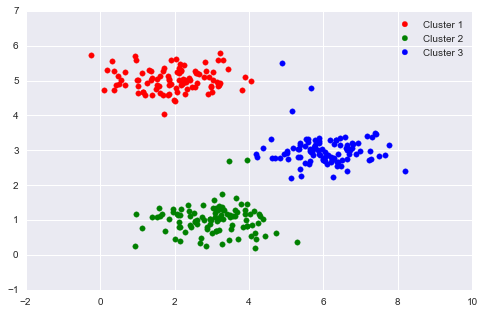

In [22]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

Looks about right. Next is apply K-Means to decompress the toucan image below so we can find a small number of colors that are most representative of the image, and map the original 24-bit colors to a lower dimensional color space. 

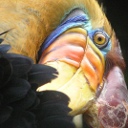

In [26]:
path4 = a + '\\bird_small.png'
path5 = a + '\\bird_small.mat'

data5 = loadmat(path5)

from IPython.display import Image
Image(filename=path4)

In [28]:
A = data5['A']
A.shape

(128, 128, 3)

In [29]:
# normalize value ranges
A = A / 255.

# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(16384, 3)

In [30]:
# randomly initialize the centroids
initial_centroids = init_centroids(X, 16)

# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)

# get the closest centroids one last time
idx = find_closest_centroids(X, centroids)

# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]
X_recovered.shape

(16384, 3)

In [31]:
# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
X_recovered.shape

(128, 128, 3)

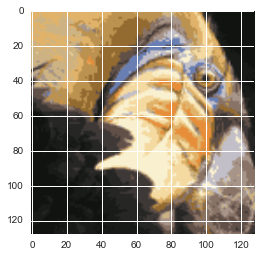

In [32]:
plt.imshow(X_recovered)

That's it for K-Means clustering - some new components were created in the image, yet it seems to have maintained the same overall feel for the image.

### Principal Component Analysis

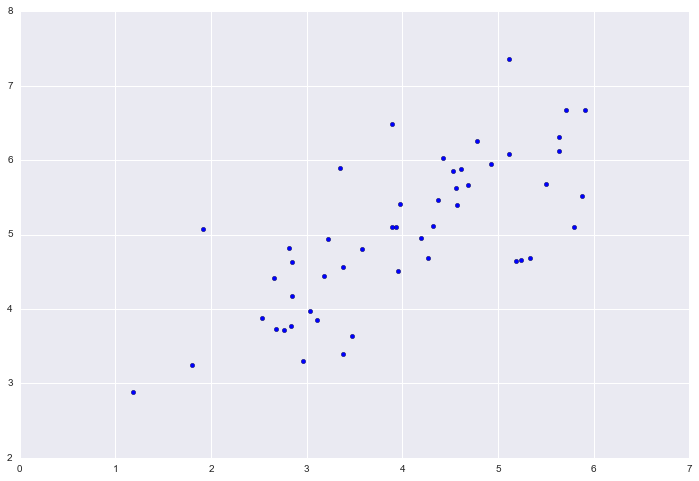

In [33]:
X = data1['X']

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1])

In [34]:
def pca(X):
    # normalize the features
    X = (X - X.mean()) / X.std()
    
    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
    
    # perform SVD
    U, S, V = np.linalg.svd(cov)
    return U, S, V

In [35]:
def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)

In [38]:
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

In [36]:
U, S, V = pca(X)
U, S, V

(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([ 1.43584536,  0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

In [37]:
Z = project_data(X, U, 1)
Z

matrix([[-4.74689738],
        [-7.15889408],
        [-4.79563345],
        [-4.45754509],
        [-4.80263579],
        [-7.04081342],
        [-4.97025076],
        [-8.75934561],
        [-6.2232703 ],
        [-7.04497331],
        [-6.91702866],
        [-6.79543508],
        [-6.3438312 ],
        [-6.99891495],
        [-4.54558119],
        [-8.31574426],
        [-7.16920841],
        [-5.08083842],
        [-8.54077427],
        [-6.94102769],
        [-8.5978815 ],
        [-5.76620067],
        [-8.2020797 ],
        [-6.23890078],
        [-4.37943868],
        [-5.56947441],
        [-7.53865023],
        [-7.70645413],
        [-5.17158343],
        [-6.19268884],
        [-6.24385246],
        [-8.02715303],
        [-4.81235176],
        [-7.07993347],
        [-5.45953289],
        [-7.60014707],
        [-4.39612191],
        [-7.82288033],
        [-3.40498213],
        [-6.54290343],
        [-7.17879573],
        [-5.22572421],
        [-4.83081168],
        [-7

In [39]:
X_recovered = recover_data(Z, U, 1)
X_recovered

matrix([[ 3.76152442,  2.89550838],
        [ 5.67283275,  4.36677606],
        [ 3.80014373,  2.92523637],
        [ 3.53223661,  2.71900952],
        [ 3.80569251,  2.92950765],
        [ 5.57926356,  4.29474931],
        [ 3.93851354,  3.03174929],
        [ 6.94105849,  5.3430181 ],
        [ 4.93142811,  3.79606507],
        [ 5.58255993,  4.29728676],
        [ 5.48117436,  4.21924319],
        [ 5.38482148,  4.14507365],
        [ 5.02696267,  3.8696047 ],
        [ 5.54606249,  4.26919213],
        [ 3.60199795,  2.77270971],
        [ 6.58954104,  5.07243054],
        [ 5.681006  ,  4.37306758],
        [ 4.02614513,  3.09920545],
        [ 6.76785875,  5.20969415],
        [ 5.50019161,  4.2338821 ],
        [ 6.81311151,  5.24452836],
        [ 4.56923815,  3.51726213],
        [ 6.49947125,  5.00309752],
        [ 4.94381398,  3.80559934],
        [ 3.47034372,  2.67136624],
        [ 4.41334883,  3.39726321],
        [ 5.97375815,  4.59841938],
        [ 6.10672889,  4.700

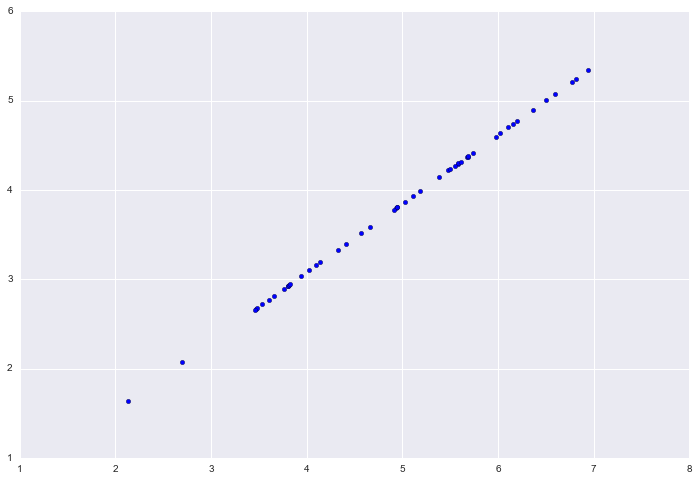

In [40]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_recovered[:, 0], X_recovered[:, 1])

In [41]:
X = data3['X']
X.shape

(5000, 1024)

In [42]:
face = np.reshape(X[3,:], (32, 32))

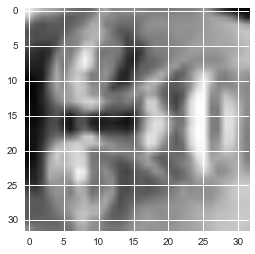

In [43]:
plt.imshow(face)

In [44]:
U, S, V = pca(X)
Z = project_data(X, U, 100)

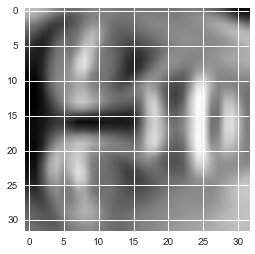

In [45]:
X_recovered = recover_data(Z, U, 100)
face = np.reshape(X_recovered[3,:], (32, 32))
plt.imshow(face)

Even after reducing the image's dimensionality by a factor of 100, it still seems to retain most of its traits!